# Flux Variance Similarity-based Water Flux Partitioning Tutorial — AmeriFlux 2025

<span style="display: inline-block; border: 1px solid #FF1111; padding: 4px; background-color: #FFFFFF; color: #FF1111;">
<b>Contributors:</b><br>
<a href="https://praghav444.github.io/">Pushpendra Raghav</a>, The University of Alabama<br>
<a href="https://www.utoledo.edu/nsm/envsciences/faculty/">Angela Che Ing Tang</a>, The University of Toledo<br>
<a href="https://inkef.wordpress.com/">Inke Forbrich</a>, The University of Toledo
</span>

---

## Table of Contents
- [Background](#scrollTo=aw8DNPvQk6HI&line=1&uniqifier=1)
- [Key Equations](#scrollTo=Rxm3uxFLl9TH&line=94&uniqifier=1)
- [Visualizing High-frequency Data](#scrollTo=598e79fd-ef4f-493e-8895-ac0c30f393ad&line=2&uniqifier=1)
- [Partitioning Demo with 1-Day sample data](#scrollTo=48c6c4ef&line=7&uniqifier=1)
- [Visualizing Partitioning Results](#results)

---



## **Background**

### What is Water Flux Partitioning?
<img src="https://github.com/praghav444/AmeriFlux-Meeting-2025-FVS-Tutorial-Wetland/blob/main/Pic1.jpg?raw=1" width="1600" height="500">

---
### FVS method partitions of water and carbon fluxes based on the **correlation structure of high-frequency measurements of water vapor and carbon dioxide  along with measured or estimated leaf-scale water use efficiency (WUE)**.

<img src="https://github.com/praghav444/AmeriFlux-Meeting-2025-FVS-Tutorial-Wetland/blob/main/stomatal_fluxes_fluc.png?raw=1" width="1600" height="350">

---

<img src="https://github.com/praghav444/AmeriFlux-Meeting-2025-FVS-Tutorial-Wetland/blob/main/nonstomatal_fluxes_fluc.png?raw=1" width="1600" height="350">

---

<img src="https://github.com/praghav444/AmeriFlux-Meeting-2025-FVS-Tutorial-Wetland/blob/main/real_fluc.png?raw=1" width="1600" height="350">

---

## **Key Equations**

The derivation of the **FVS** method begins by decomposing the high-frequency time series of carbon dioxide and water vapor into two distinct components:

- **Stomatal components** ($c_p$ and $q_t$), which are associated with **photosynthesis** and **transpiration**.  
- **Non-stomatal components** ($c_r$ and $q_e$), which correspond to **respiration** and **evaporation**.


**Final Equations for the flux components:**


$$
\frac{E}{T} = -\rho_{c_p, c_r}^2 + \rho_{c_p, c_r}^2
\sqrt{ 1 - \rho_{c_p, c_r}^{-2}
\left( 1 - \frac{{\color{red}{WUE}}^2 \, \sigma_q^2}{\sigma_{c_p}^2} \right) }
\tag{1}
$$

$$
\rho_{c_p, c_r}^2 =
\frac{
(1 - \rho_{c,q}^2) \, \sigma_q^2 \sigma_c^2
\left( \overline{w'c'} - \overline{w'q'} \, {\color{red}{WUE}} \right)^2
}{
\left(
\sigma_q^2 \, \overline{w'c'}^2
- 2 \rho_{c,q} \sigma_q \sigma_c \, \overline{w'q'} \, \overline{w'c'}
+ \sigma_c^2 \, \overline{w'q'}^2
\right)
\left(
\sigma_c^2 - 2 \rho_{c,q} \sigma_q \sigma_c
\right)
}
\tag{2}
$$


$$
\sigma_{c_p}^2 =
\frac{
(1 - \rho_{c,q}^2) \, (\sigma_q \sigma_c {\color{red}{WUE}})^2
\left(
\sigma_q^2 \, \overline{w'c'}^2
- 2 \rho_{c,q} \sigma_q \sigma_c \, \overline{w'q'} \, \overline{w'c'}
+ \sigma_c^2 \, \overline{w'q'}^2
\right)
}{
\left[
\sigma_c^2 \, \overline{w'q'} + \sigma_q^2 \, \overline{w'c'} {\color{red}{WUE}}
- \rho_{c,q} \sigma_q \sigma_c
\left( \overline{w'c'} + \overline{w'q'} {\color{red}{WUE}} \right)
\right]^2
}
\tag{3}
$$

**The following conditions must be satisfied to ensure physically meaningful flux estimates**  
*(<a href="https://doi.org/10.1016/j.agrformet.2019.107732" target="_blank">Scanlon et al., 2019</a>)*

$$(P \le 0 \text{ and } R,\, T,\, E \ge 0):$$

<a id="eq4a"></a>  
**For** $\rho_{c,q} < 0$:

$$
\frac{\sigma_c}{\sigma_q}\frac{1}{\rho_{c,q}}
\;\le\;
\frac{\overline{w'c'}}{\overline{w'q'}}
\; < \;
\rho_{c,q}\,\frac{\sigma_c}{\sigma_q}
\tag{4a}
$$

<a id="eq4b"></a>  
**For** $\rho_{c,q} > 0$:

$$
\frac{\overline{w'c'}}{\overline{w'q'}}
\; < \;
\rho_{c,q}\,\frac{\sigma_c}{\sigma_q}
\tag{4b}
$$



**Leaf-level Water Use Efficiency (WUE)** can be estimated as:

$$
\text{WUE} = \frac{F_{c_p}}{F_{q_t}}
= \frac{ g_c \, (\color{red}{c_i} - c_a) }{ g_w \, ( q^{*}(T_L) - q_a ) }
= \frac{ 0.65 \, (\color{red}{c_i} - c_a) }{ q^{*}(T_L) - q_a }
\tag{5}
$$


The quantities c$_a$ and q$_a$ can be estimated from **above-canopy tower measurements** by extrapolating a logarithmic mean profile with stability corrections to the zero-plane displacement height.

The intercellular CO$_2$ concentration (c$_i$) can be estimated using one of the following models:

---

### 1. Constant ppm model

$$
c_i = f\big(c_{i,\text{ppm}},\, T_a,\, P\big)
$$

where

$$
c_{i,\text{ppm}} =
\begin{cases}
280~\text{ppm}, & \text{for C$_3$ vegetation}, \\[4pt]
130~\text{ppm}, & \text{for C$_4$ vegetation}.
\end{cases}
$$

---

### 2. Constant ratio model

$$
\frac{c_i}{c_a} = K,
\qquad
K =
\begin{cases}
0.70, & \text{C3} \\
0.44, & \text{C4}
\end{cases}
$$

---

### 3. Linear model

$$
\frac{c_i}{c_a} = a - b\cdot \mathrm{VPD},
\qquad a \approx 1,
\quad b =
\begin{cases}
1.6\times 10^{-4}\ \text{Pa}^{-1}, & \text{C3} \\
2.7\times 10^{-4}\ \text{Pa}^{-1}, & \text{C4}
\end{cases}
$$

---

### 4. Square-root model

$$
\frac{c_i}{c_a} = 1 - \sqrt{\frac{1.6\,\lambda\,\mathrm{VPD}}{c_a}},
\qquad
\lambda = 22\times10^{-9}\ \mathrm{kg\ CO_2\ m^{-3}\ Pa^{-1}}\ (\text{for C3 crops})
$$

---

### 5. Optimum Model *(<a href="https://doi.org/10.1016/j.agrformet.2019.107732" target="_blank">Scanlon et al., 2019</a>)*

$$
\mathrm{WUE}_{\mathrm{opt}} =
\frac{
DR \cdot \mathrm{VPD} \cdot m
- \sqrt{DR \cdot \mathrm{VPD} \cdot m \cdot \big(c_a + DR \cdot \mathrm{VPD} \cdot m\big)}
}{
DR \cdot \mathrm{VPD}
}
$$

with

$$
m =
\frac{
 -\big(\sigma_c^2 F_q - \rho_{c,q}\,\sigma_q\,\sigma_c\,F_c\big)
}{
 \sigma_q^2 F_c - \rho_{c,q}\,\sigma_q\,\sigma_c\,F_q
}.
$$

- DR: Ratio of the molecular diffusivities for water vapor and CO2 (with a value of 1.6)

---


# Let's get started with actual data

In [1]:
import numpy as np; import pandas as pd
from glob import glob; import os
import matplotlib.pyplot as plt

## Functions to process high-frequency data

In [2]:
def WPL_LI7500(P, ea, tair, T, Q, C):
    """
    Apply the WPL correction for water vapor and carbon dioxide concentrations.

    Parameters:
    P: Air pressure (Pa)
    ea: Water vapor pressure (Pa)
    tair: Air temperature (C)
    T: Sonic temperature (C)
    Q: Water vapor density from open-path (mmol m-3)
    C: Carbon dioxide concentration from open-path (mmol m-3)

    Returns:
    Q_WPL: Corrected water vapor density
    C_WPL: Corrected carbon dioxide concentration
    Tr: Corrected air temperature (C)
    """
    R = 8.314  # Universal gas constant [J/K/mol]
    m_q = 18.015  # Molecular mass of water vapor, g/mol
    m_a = 28.966  # Molecular mass of dry air, g/mol
    mu = m_a / m_q  # Ratio of molecular masses

    # Convert temperatures to Kelvin
    tair_K = tair + 273.16
    TK = T + 273.16

    # Air molar density [mol/m^3]
    rho = P / (R * tair_K)

    # Water vapor density [mol/m^3]
    rhov = ea / (R * tair_K)

    # Dry air molar density [mol/m^3]
    rhoa = rho - rhov

    # Water vapor mixing ratio (corrected with measured RH)
    xv = R * Q * TK / (1000 * P)
    xv_corr = xv - np.nanmean(xv) + ea / P

    # Real temperature [C] correction based on Kaiamal and Gaynor (1990) eq.3
    Tr = TK / (1 + 0.32 * xv_corr) - 273.16

    # Detto and Katul BLM, 2007 correction
    si = rhov / rhoa
    tn = Tr - np.nanmean(Tr)
    qn = (Q - np.nanmean(Q)) * 1e-3

    A = mu * qn / rhoa + (1 + mu * si) * tn / tair_K
    Q_WPL = Q + np.nanmean(Q) * A
    C_WPL = C + np.nanmean(C) * A

    return Q_WPL, C_WPL, Tr

#-------------------------------------------------------------------------------------------
def tilt_correction(u, v, w, method='PF', Err=1):
    """
    Tilt correction for wind velocity components using the Planar Fit method (PF).

    Parameters:
    u: np.ndarray - First wind component (horizontal)
    v: np.ndarray - Second wind component (horizontal)
    w: np.ndarray - Vertical wind component
    method: str - Correction method ('PF' for Planar Fit)
    Err: int - Error handling (0 or 1)

    Returns:
    U1, V1, W1: np.ndarray - Corrected wind components
    coeffs: tuple (optional) - Coefficients of planar fit (b0, b1, b2)

    [1] Wilczak, J. M., Oncley, S. P., & Stage, S. A. (2001).
    Sonic anemometer tilt correction algorithms.
    Boundary-Layer Meteorology, 99(1), 127-150.
    """

    # If no vertical wind component (w), handle horizontal correction only
    if w is None or w.size == 0:
        U1, V1 = np.zeros_like(u), np.zeros_like(v)
        for i in range(len(u)):
            A0 = np.array([u[i], v[i]])
            R = np.arctan2(np.mean(A0[0]), np.mean(A0[1]))
            R1 = np.array([[np.cos(R), -np.sin(R)], [np.sin(R), np.cos(R)]])
            A1 = np.dot(R1, A0)
            U1[i], V1[i] = A1[1], A1[0]
        return U1, V1, None

    # For PF (Planar Fit) method
    if method == 'PF':
        meanU, meanV, meanW = np.nanmean(u, axis=1), np.nanmean(v, axis=1), np.nanmean(w, axis=1)

        # Remove NaN values
        mask = np.isfinite(meanU) & np.isfinite(meanV) & np.isfinite(meanW)
        meanU, meanV, meanW = meanU[mask], meanV[mask], meanW[mask]

        U1, V1, W1 = np.zeros_like(u), np.zeros_like(v), np.zeros_like(w)

        # Find the b0, b1, b2 coefficients
        b0, b1, b2 = findB(meanU, meanV, meanW)

        # Error check for 'Err' parameter
        if Err == 0:
            b0 = 0
        elif Err != 1:
            raise ValueError("'Err' should be 0 or 1")

        Deno = np.sqrt(1 + b1**2 + b2**2)
        p31, p32, p33 = -b1 / Deno, -b2 / Deno, 1 / Deno

        cosGamma = p33 / np.sqrt(p32**2 + p33**2)
        sinGamma = -p32 / np.sqrt(p32**2 + p33**2)
        cosBeta = np.sqrt(p32**2 + p33**2)
        sinBeta = p31

        R2 = np.array([[1, 0, 0], [0, cosGamma, -sinGamma], [0, sinGamma, cosGamma]])
        R3 = np.array([[cosBeta, 0, sinBeta], [0, 1, 0], [-sinBeta, 0, cosBeta]])

        A0 = np.dot(np.dot(R3.T, R2.T), np.array([meanU, meanV, meanW]))
        Alpha = np.arctan2(A0[1], A0[0])

        for i in range(len(meanU)):
            R1 = np.array([[np.cos(Alpha[i]), -np.sin(Alpha[i]), 0], [np.sin(Alpha[i]), np.cos(Alpha[i]), 0], [0, 0, 1]])
            A1 = np.dot(R1.T, np.dot(R3.T, np.dot(R2.T, np.array([u[i], v[i], w[i] - b0]))))
            U1[i], V1[i], W1[i] = A1[0], A1[1], A1[2]

        return U1, V1, W1

    if method == 'rot2':
        U1, V1, W1 = np.zeros_like(u), np.zeros_like(v), np.zeros_like(w)
        M = len(u)
        for ii in range(M):
            # First rotation (around z axis)
            A01 = np.array([u[ii], v[ii]])
            R1 = np.arctan2(np.nanmean(A01[1]), np.nanmean(A01[0]))
            R1_matrix = np.array([[np.cos(R1), np.sin(R1)], [-np.sin(R1), np.cos(R1)]])
            A1 = np.dot(R1_matrix, A01)
            u1 = A1[0]
            V1[ii] = A1[1]

            # Second rotation (around y axis)
            A02 = np.array([u1, w[ii]])
            R2 = np.arctan2(np.nanmean(A02[1]), np.nanmean(A02[0]))
            RotY = np.array([[np.cos(R2), np.sin(R2)], [-np.sin(R2), np.cos(R2)]])
            A2 = np.dot(RotY, A02)
            U1[ii] = A2[0]
            W1[ii] = A2[1]
        return U1, V1, W1

    if method == 'rot3':
        M = len(u)
        U1, V1, W1 = np.zeros_like(u), np.zeros_like(v), np.zeros_like(w)
        for ii in range(M):
            # First rotation (around z axis)
            A01 = np.array([u[ii], v[ii]])
            R1 = np.arctan2(np.nanmean(A01[1]), np.nanmean(A01[0]))
            R1_matrix = np.array([[np.cos(R1), np.sin(R1)], [-np.sin(R1), np.cos(R1)]])
            A1 = np.dot(R1_matrix, A01)
            u1 = A1[0]
            v1 = A1[1]

            # Second rotation (around y axis)
            A02 = np.array([u1, w[ii]])
            R2 = np.arctan2(np.nanmean(A02[1]), np.nanmean(A02[0]))
            RotY = np.array([[np.cos(R2), np.sin(R2)], [-np.sin(R2), np.cos(R2)]])
            A2 = np.dot(RotY, A02)
            U1[ii, :] = A2[0]
            w1 = A2[1]

            # Third rotation (around x axis)
            A03 = np.array([v1, w1])
            covVW = np.nanmean(v1 * w1)
            diffVW = np.var(v1) - np.var(w1)
            R3 = 0.5 * np.arctan2(2 * covVW, diffVW)
            RotX = np.array([[np.cos(R3), np.sin(R3)], [-np.sin(R3), np.cos(R3)]])
            A3 = np.dot(RotX, A03)
            V1[ii, :] = A3[0]
            W1[ii, :] = A3[1]
        return U1, V1, W1
    else:
        raise ValueError("Invalid method. Must be 'PF' or 'rot2' or 'rot3'.")

def findB(meanU, meanV, meanW):
    """ Helper function to find the b0, b1, b2 coefficients for Planar Fit method """
    M = len(meanU)
    su, sv, sw = np.sum(meanU), np.sum(meanV), np.sum(meanW)
    suv = np.dot(meanU, meanV)
    suw = np.dot(meanU, meanW)
    svw = np.dot(meanV, meanW)
    su2 = np.dot(meanU, meanU)
    sv2 = np.dot(meanV, meanV)

    H = np.array([[M, su, sv], [su, su2, suv], [sv, suv, sv2]])
    g = np.array([sw, suw, svw])
    x = np.linalg.solve(H, g)

    return x[0], x[1], x[2]

NP_TYPE = {
    "IEEE4": np.float32,
    "IEEE8": np.float64,
    "LONG": np.int32,
    "ULONG": np.uint32,
}
#-------------------------------------------------------------------------------------------
def ndarray_read_tob1(tobfile, count=-1):
    """Read TOB1 data file into structured numpy array."""
    with open(tobfile, "rb") as f:
        f.readline()
        names = f.readline().decode().strip().replace('"', "").split(",")
        f.readline()
        f.readline()
        types = f.readline().decode().strip().replace('"', "").split(",")
        dtype = np.dtype([(n, NP_TYPE[t]) for n, t in zip(names, types)])
        return pd.DataFrame(np.fromfile(f, dtype=dtype, count=count))
#-------------------------------------------------------------------------------------------

## Download Sample Input Data files from Google Drive

In [3]:
import os
from google.colab import drive
import subprocess

data_dir = "Sample_Input_Data"
os.makedirs(data_dir, exist_ok=True)

drive_url = "https://drive.google.com/drive/folders/16v1Ou3IfciEwbreVn4bgitTG3ReIAQXs?usp=sharing"
folder_id = "16v1Ou3IfciEwbreVn4bgitTG3ReIAQXs"
!gdown --folder https://drive.google.com/drive/folders/{folder_id} -O {data_dir}

print(f"Data downloaded to: {os.path.abspath(data_dir)}")

Retrieving folder contents
Processing file 1sUtnMbiVL87jya8BsOM15koys6FM83pE TOB1_19523.Time_Series_2024_08_01_0500.dat
Processing file 1s437R8q75hiE1rpJa6WLmF-ecISWSkdr TOB1_19523.Time_Series_2024_08_01_0530.dat
Processing file 1oE2BkOY1dDzkj2XAfB-K7Mh2O6kPPB4h TOB1_19523.Time_Series_2024_08_01_0600.dat
Processing file 1RQbykJ9X-eSOOhWqpIhMDo0IZ1lr5-O3 TOB1_19523.Time_Series_2024_08_01_0630.dat
Processing file 1ivujVUDr1UtdCRsSjLzTSQmmA3tz8eJX TOB1_19523.Time_Series_2024_08_01_0700.dat
Processing file 11m9HRxK-msICMONqgE8gXe-EpYhVn4H3 TOB1_19523.Time_Series_2024_08_01_0730.dat
Processing file 10YovyIWa5sF4951ELj7a3xGxmE7huH5g TOB1_19523.Time_Series_2024_08_01_0800.dat
Processing file 1gDNm0m98w7E9ZUmQwBAy4xeMGLuOl-i8 TOB1_19523.Time_Series_2024_08_01_0830.dat
Processing file 1DU1UOob0-ikBncDodApPW2gUb_uS65M3 TOB1_19523.Time_Series_2024_08_01_0900.dat
Processing file 15tXqsvrNYlQE1mOFX9IWeUjsOTfUsATC TOB1_19523.Time_Series_2024_08_01_0930.dat
Processing file 1E83o4UVyXWIJu717Q3Zfg1nL3a

## Let's visualize the data

In [4]:
# Let's first see what each file contains
tob1_files = sorted(glob("Sample_Input_Data/*.dat"))  # All files (each file contains data for specifc 30 minute period at 10 Hz Frequency)
tobfile = tob1_files[0]   # Let's take first file for illustration
df = ndarray_read_tob1(tobfile, count=-1)
df["Datetime"] = pd.to_datetime( arg=df.loc[:, "SECONDS"] + 10**-9 * df.loc[:, "NANOSECONDS"], unit="s", origin="1990-01-01", )
df = df[["Datetime"] + [col for col in df.columns if col != "Datetime"]]
df

,Datetime,SECONDS,NANOSECONDS,RECORD,Ux,Uy,Uz,T_SONIC,diag_sonic,CO2,...,CO2_sig_strgth,H2O_sig_strgth,PA_diff,PA,pump_flow,sampling_regime,CH4_77,amb_press_77,amb_tmpr_77,rssi_77
0,2024-08-01 05:00:00.099999905,1091336400,100000000,61023140,1.249938,-0.261576,-0.057781,24.810020,0.0,452.951172,...,0.898786,0.883589,-6.960594,101.406532,7.991676,1,0.086101,100.808998,23.226601,36.039101
1,2024-08-01 05:00:00.200000048,1091336400,200000000,61023141,1.371775,-0.256033,-0.028694,24.766039,0.0,453.079468,...,0.898773,0.883606,-6.962509,101.406975,8.008585,1,0.086182,100.810997,23.227800,36.215401
2,2024-08-01 05:00:00.299999952,1091336400,300000000,61023142,1.379352,-0.094716,0.003343,24.818125,0.0,453.283173,...,0.898752,0.883610,-6.961143,101.405380,8.001822,1,0.086121,100.809998,23.226601,36.246201
3,2024-08-01 05:00:00.400000095,1091336400,400000000,61023143,1.383122,-0.159696,-0.108133,24.935398,0.0,453.155884,...,0.898821,0.883594,-6.951653,101.403824,7.995739,1,0.086066,100.810997,23.229099,36.254601
4,2024-08-01 05:00:00.500000000,1091336400,500000000,61023144,1.326722,-0.200474,-0.139522,24.981541,0.0,453.306305,...,0.898829,0.883615,-6.953293,101.404106,7.996785,1,0.086072,100.808998,23.229799,36.330502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,2024-08-01 05:29:59.599999905,1091338199,600000000,61041135,0.891250,-0.096781,-0.102264,25.661280,0.0,448.725281,...,0.899074,0.883783,-6.973877,101.448410,7.996475,1,0.080192,100.833000,24.471500,39.344501
17996,2024-08-01 05:29:59.700000048,1091338199,700000000,61041136,0.811663,-0.125956,-0.084263,25.656630,0.0,448.990601,...,0.899084,0.883784,-6.974976,101.448242,7.993465,1,0.085763,100.833000,24.486200,39.169998
17997,2024-08-01 05:29:59.799999952,1091338199,800000000,61041137,0.838794,-0.093056,-0.089647,25.662853,0.0,448.675842,...,0.899101,0.883757,-6.970856,101.448959,8.008109,1,0.086358,100.833000,24.475901,39.125198
17998,2024-08-01 05:29:59.900000095,1091338199,900000000,61041138,0.927211,-0.070516,-0.076578,25.658430,0.0,449.036011,...,0.899057,0.883792,-6.967384,101.448685,8.001318,1,0.086230,100.833000,24.471800,39.276798


#### Stomatal fluxes vs non-stomatal fluxes

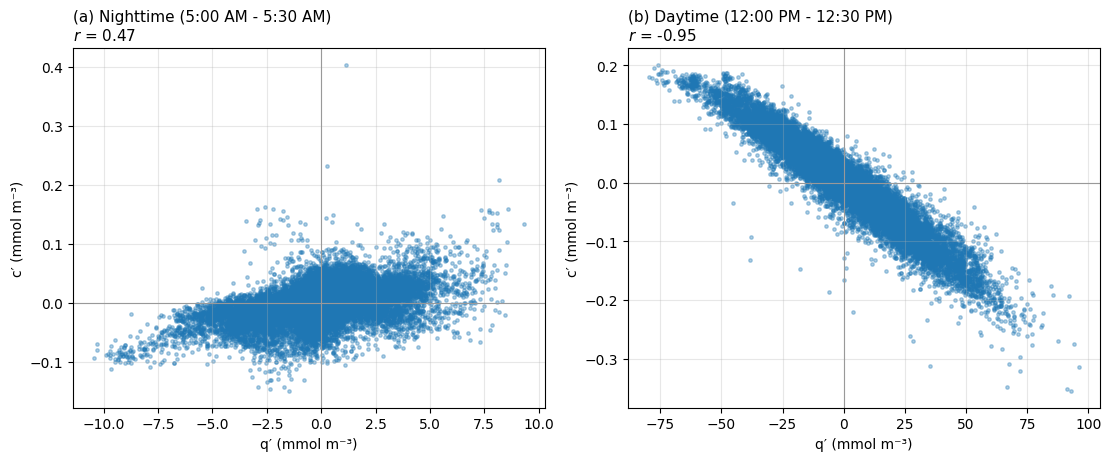

In [5]:
import matplotlib.pyplot as plt
input_dir = "Sample_Input_Data"
q_units = "ppt_dry"   # mmolH2O mol-1
c_units = "ppm_dry"   # umolCO2 mol-1
night_idx, day_idx = 0, 12
rolling_window = 4001
def load_and_preprocess(tobfile):
    """Read TOB1 file and return H2O_prime, CO2_prime."""
    # read file and build Datetime
    df = ndarray_read_tob1(tobfile, count=-1)
    df["Datetime"] = pd.to_datetime(
        arg=df.loc[:, "SECONDS"] + 10**-9 * df.loc[:, "NANOSECONDS"],
        unit="s", origin="1990-01-01",
    )
    key_vars = ['Datetime', 'H2O', 'CO2', 'PA', 'TA_1_1_1', 'T_SONIC', 'Ux', 'Uy', 'Uz']
    df = df[key_vars]

    # unit conversion
    coef = 1e3 if q_units[:3] == "ppt" else 1e6
    c = df['CO2'].values
    q = df['H2O'].values
    p = df['PA'].values * 1e3
    t = df['TA_1_1_1'].values + 273.15

    q_mole_ratio = q / coef
    q = q_mole_ratio * p / (8.3144598 / 0.018016) / t

    coef = 1e3 if c_units[:3] == "ppt" else 1e6
    c_mole_ratio = c / coef
    c = c_mole_ratio * p / (8.3144598 / 0.044010) / t
    c /= 1 + c_mole_ratio
    q /= 1 + q_mole_ratio

    CO2_raw = c * 1e3 * 1e3 / 44.01   # CO2 conc., mmol m-3
    H2O_raw = q * 1e3 * 1e3 / 18.016  # H2O conc., mmol m-3

    # filter unrealistic values
    CO2_raw[(CO2_raw > 100) | (CO2_raw < 0)] = np.nan
    H2O_raw[(H2O_raw > 2000) | (H2O_raw < 0)] = np.nan

    # compute primes with centered rolling mean
    H2O_prime = (pd.Series(H2O_raw) - pd.Series(H2O_raw).rolling(window=rolling_window,
                                                                   min_periods=1, center=True).mean()).to_numpy()
    CO2_prime = (pd.Series(CO2_raw) - pd.Series(CO2_raw).rolling(window=rolling_window,
                                                                   min_periods=1, center=True).mean()).to_numpy()
    return H2O_prime, CO2_prime, df['Datetime']

# --- load files -------------------------------------------------------------
tob_files = sorted(glob(os.path.join(input_dir, "*.dat")))
if len(tob_files) == 0:
    raise FileNotFoundError(f"No .dat files found in {input_dir!r}")

night_file = tob_files[night_idx]
day_file   = tob_files[day_idx]

H2O_p_n, CO2_p_n, dt_n = load_and_preprocess(night_file)
H2O_p_d, CO2_p_d, dt_d = load_and_preprocess(day_file)

valid_n = (~np.isnan(H2O_p_n)) & (~np.isnan(CO2_p_n))
valid_d = (~np.isnan(H2O_p_d)) & (~np.isnan(CO2_p_d))
# --- plotting ---------------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(11, 4.5), constrained_layout=True)

def do_scatter(ax, H2O_p, CO2_p, valid_mask, title, label):
    H2O_plot = H2O_p[valid_mask]
    CO2_plot = CO2_p[valid_mask]
    r = np.corrcoef(H2O_plot, CO2_plot)[0, 1] if len(H2O_plot) > 1 else np.nan

    ax.scatter(H2O_plot, CO2_plot, s=6, alpha=0.35)
    ax.set_title(f"({label}) {title}\n$r$ = {r:.2f}", loc='left', fontsize=11)
    ax.set_xlabel("q′ (mmol m⁻³)", fontsize=10)
    ax.set_ylabel("c′ (mmol m⁻³)", fontsize=10)
    ax.axhline(0, color='0.6', lw=0.8)
    ax.axvline(0, color='0.6', lw=0.8)
    ax.grid(True, alpha=0.3)

do_scatter(axes[0], H2O_p_n, CO2_p_n, valid_n,
           "Nighttime (5:00 AM - 5:30 AM)", "a")
do_scatter(axes[1], H2O_p_d, CO2_p_d, valid_d,
           "Daytime (12:00 PM - 12:30 PM)", "b")
plt.show()

## Let's Plot High Frequency Time Series of Key Variables

TOB1_19523.Time_Series_2024_08_01_1630.dat


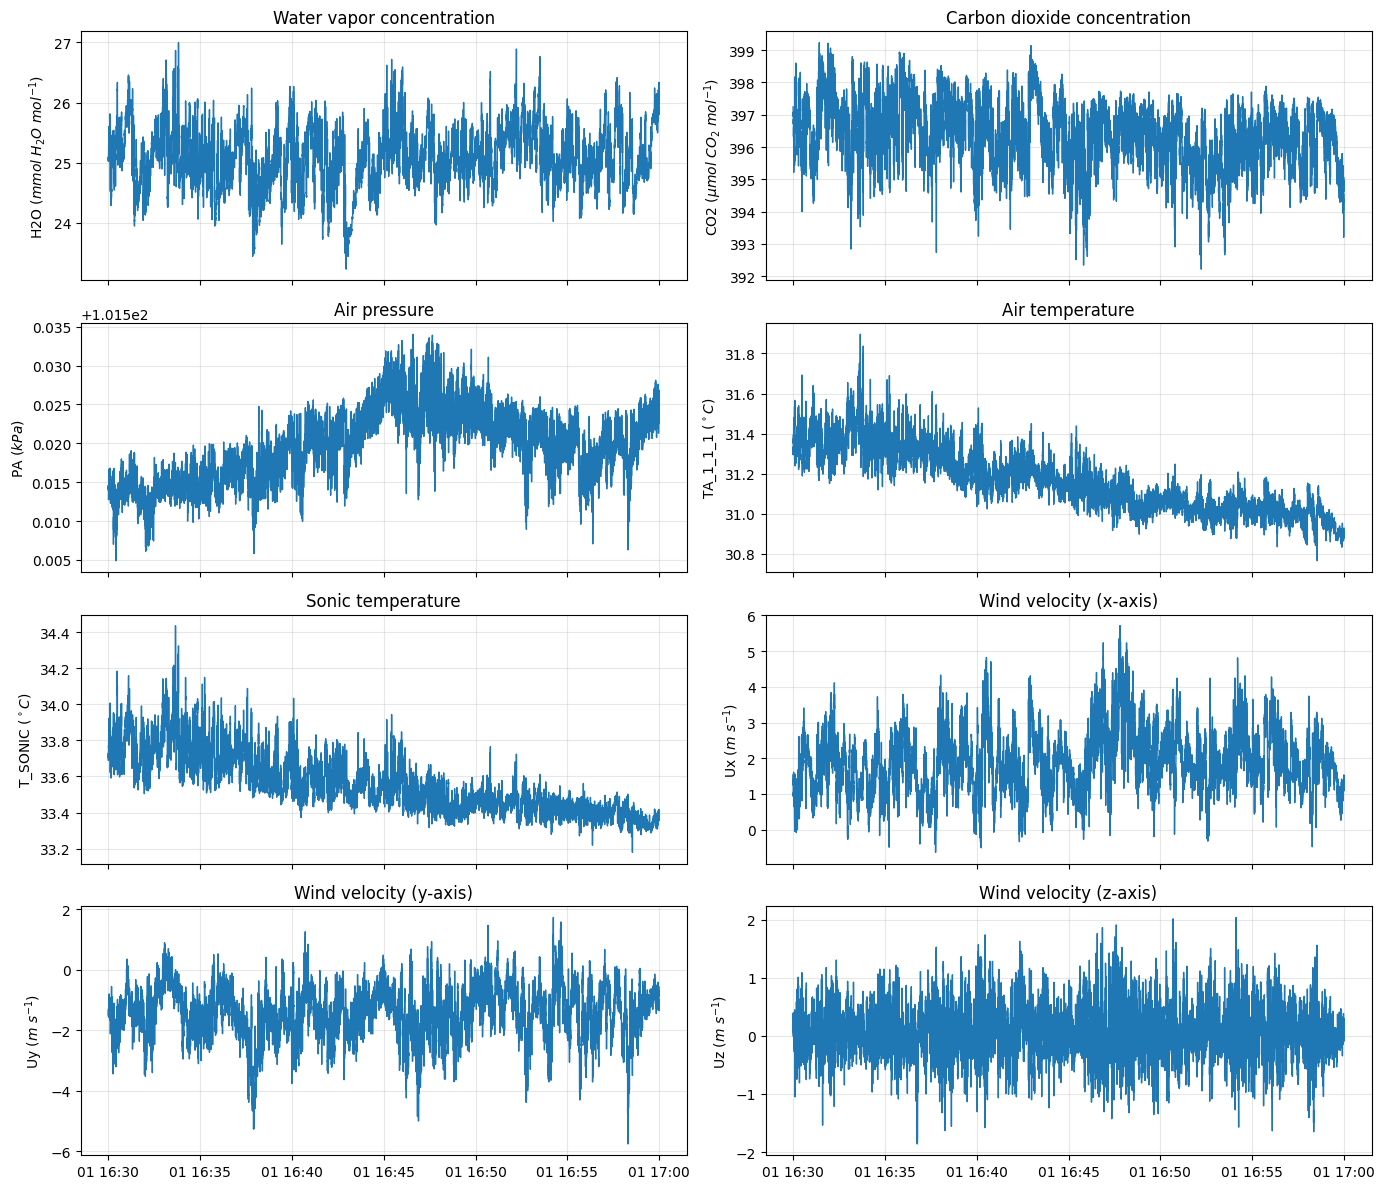

In [6]:
tob1_files = glob("Sample_Input_Data/*.dat")
tobfile = tob1_files[0]
filename = os.path.basename(tobfile)
print(filename)
# Reading the file and creating dataframe
df = ndarray_read_tob1(tobfile, count=-1)
df["Datetime"] = pd.to_datetime( arg=df.loc[:, "SECONDS"] + 10**-9 * df.loc[:, "NANOSECONDS"], unit="s", origin="1990-01-01", )
key_vars = ['Datetime', 'H2O', 'CO2', 'PA', 'TA_1_1_1', 'T_SONIC', 'Ux', 'Uy', 'Uz']
units = {
    'H2O': r'$mmol\ H_2O\ mol^{-1}$',
    'CO2': r'$\mu mol\ CO_2\ mol^{-1}$',
    'PA': r'$kPa$',
    'TA_1_1_1': r'$^\circ C$',
    'T_SONIC': r'$^\circ C$',
    'Ux': r'$m\ s^{-1}$',
    'Uy': r'$m\ s^{-1}$',
    'Uz': r'$m\ s^{-1}$'
}
descriptions = {
    'H2O': 'Water vapor concentration',
    'CO2': 'Carbon dioxide concentration',
    'PA': 'Air pressure',
    'TA_1_1_1': 'Air temperature',
    'T_SONIC': 'Sonic temperature',
    'Ux': 'Wind velocity (x-axis)',
    'Uy': 'Wind velocity (y-axis)',
    'Uz': 'Wind velocity (z-axis)'
}
df = df[key_vars]

fig, axes = plt.subplots(4, 2, figsize=(14, 12), sharex=True)
axes = axes.flatten()

for i, var in enumerate(key_vars[1:]):
    ax = axes[i]
    ax.plot(df['Datetime'], df[var], lw=1)
    ax.set_title(f"{descriptions[var]}", fontsize=12)
    ax.set_ylabel(f"{var} ({units.get(var, '')})", fontsize=10)
    ax.grid(True, alpha=0.3)

if len(key_vars[1:]) < len(axes):
    axes[-1].axis('off')

plt.tight_layout()
plt.show()

### Let's compute key statistics — means, standard deviations, covariances, and correlations — required for the FVS method ([see Eqs. 1–3](#scrollTo=Rxm3uxFLl9TH&line=1&uniqifier=1)) above.


In [7]:
# =============================================================
# 1. Load all sample files & initialize
# =============================================================
q_units = "ppt_dry"  # mmolH2O mol-1
c_units = "ppm_dry"  # umolCO2 mol-1
tob1_files = glob("Sample_Input_Data/*.dat")
df_final = []
# =============================================================
# 2. Loop through files
# =============================================================
for tobfile in tob1_files:
    filename = os.path.basename(tobfile)
    print("Processing file: ", filename)
    # Extracting date and time from filename
    year = filename.split('.')[1].split('_')[2]
    month = filename.split('.')[1].split('_')[3]
    day = filename.split('.')[1].split('_')[4]
    hour_minute = filename.split('.')[1].split('_')[5]
    hour = hour_minute[:2]
    minute = int(hour_minute[2:])
    # Account for partial files
    if 0 < minute < 30:
        minute = 0
    elif 30 <= minute < 60:
        minute = 30
    DateTime = f"{year}-{month}-{day} {hour}:{minute:02d}:00"

    # Read the file
    df = ndarray_read_tob1(tobfile, count=-1)
    # Add DateTime column
    df["Datetime"] = pd.to_datetime(
        arg=df.loc[:, "SECONDS"] + 10**-9 * df.loc[:, "NANOSECONDS"],
        unit="s", origin="1990-01-01",
    )

    # =============================================================
    # 3. Extract key variables and convert units
    # =============================================================
    coef = 1e3 if q_units[:3] == "ppt" else 1e6
    q = df['H2O'].values
    c = df['CO2'].values
    p = df['PA'].values * 1e3
    t = df['TA_1_1_1'].values + 273.15

    # --- Convert H2O to molar conc. (mmol m-3) ---
    q_mole_ratio = q / coef
    q = q_mole_ratio * p / (8.3144598 / 0.018016) / t

    # --- Convert CO2 to molar conc. (mmol m-3) ---
    coef = 1e3 if c_units[:3] == "ppt" else 1e6
    c_mole_ratio = c / coef
    c = c_mole_ratio * p / (8.3144598 / 0.044010) / t

    # --- Adjust for dry mole fraction ---
    if c_units[-3:] == "dry":
        c /= 1 + c_mole_ratio
    if q_units[-3:] == "dry":
        q /= 1 + q_mole_ratio

    CO2_raw = c*1e3*1e3/44.01                    # CO2 conc., mmol m-3
    H2O_raw = q*1e3*1e3/18.016                   # H2O conc., mmol m-3
    T_raw = df['TA_1_1_1'].values                # Air temperature, degrees C
    P_raw = df['PA'].values                      # Air pressure, kPa
    U_raw = df['Ux'].values                      # U velocity component, m s-1
    V_raw = df['Uy'].values                      # V velocity component, m s-1
    W_raw = df['Uz'].values                      # W velocity component, m s-1
    Tsonic_raw = df['T_SONIC'].values + 273.15   # Sonic temperature, K

    # =============================================================
    # 4. Clean data
    # =============================================================
    CO2_raw[(CO2_raw > 100) | (CO2_raw < 0)] = np.nan
    H2O_raw[(H2O_raw > 2000) | (H2O_raw < 0)] = np.nan
    T_raw[(T_raw > 60) | (T_raw < -50)] = np.nan
    W_raw[(W_raw > 20) | (W_raw < -20)] = np.nan
    Tsonic_raw[(Tsonic_raw > (60 + 273.15)) | (Tsonic_raw < (-50 + 273.15))] = np.nan

    # =============================================================
    # 5. Apply tilt correction to wind components
    # =============================================================
    U_raw = U_raw.reshape(-1,1)
    V_raw = V_raw.reshape(-1,1)
    W_raw = W_raw.reshape(-1,1)
    U_rot, V_rot, W_rot = tilt_correction(U_raw, V_raw, W_raw, method='PF')
    U_rot = U_rot.reshape(-1)
    V_rot = V_rot.reshape(-1)
    W_rot = W_rot.reshape(-1)

    CO2_mean = np.nanmean(CO2_raw) # Mean CO2 conc., mmol m-3
    H2O_mean = np.nanmean(H2O_raw) # Mean H2O conc., mmol m-3
    T_mean = np.nanmean(T_raw)     # Mean air temperature, degrees C
    P_mean = np.nanmean(P_raw)     # Mean air pressure, kPa

    # =============================================================
    # 6. Apply WPL correction - after Detto and Katul (2007)  <-- Not needed for closed path gas analyzer
    # =============================================================
    #ea = H2O_mean/1000*8.3143*(T_mean+273.15)  # vapor pressure, Pa
    #H2O_WPL,CO2_WPL,Tr = WPL_LI7500(P_mean*1000,ea,T_mean,Tsonic_raw-273.15,H2O_raw,CO2_raw)
    H2O_WPL,CO2_WPL = H2O_raw, CO2_raw

    # =============================================================
    # 7. Compute moving-mean fluctuations (w', c', q')
    # =============================================================
    H2O_prime = (pd.Series(H2O_WPL) - pd.Series(H2O_WPL).rolling(window=4001, min_periods=1, center=True).mean()).to_numpy()
    CO2_prime = (pd.Series(CO2_WPL) - pd.Series(CO2_WPL).rolling(window=4001, min_periods=1, center=True).mean()).to_numpy()
    w_prime = (pd.Series(W_rot) - pd.Series(W_rot).rolling(window=4001, min_periods=1, center=True).mean()).to_numpy()

    # =============================================================
    # 8. Compute statistical moments for FVS equations
    # =============================================================
    sdq = np.nanstd(H2O_prime)         # Standard deviation in H2O molar conc., mmol m-3
    sdc = np.nanstd(CO2_prime);        # Standard deviation in CO2 molar conc., mmol m-3
    Fc = np.nanmean(w_prime*CO2_prime) #CO2 flux, mmol m s-1 m-3
    Fq = np.nanmean(w_prime*H2O_prime) #H2O flux, mmol m s-1 m-3
    rho_cq = np.nanmean(CO2_prime*H2O_prime)/np.nanstd(CO2_prime)/np.nanstd(H2O_prime)

    temp = pd.DataFrame({'DateTime':[DateTime], 'CO2_mean':[CO2_mean],'H2O_mean':[H2O_mean],'T_mean':[T_mean],
                        'P_mean':[P_mean],'sdq':[sdq],'sdc':[sdc],'Fc':[Fc],'Fq':[Fq],'rho_cq':[rho_cq]})
    df_final.append(temp)
df_final = pd.concat(df_final, ignore_index=True)

Processing file:  TOB1_19523.Time_Series_2024_08_01_1630.dat
Processing file:  TOB1_19523.Time_Series_2024_08_01_1530.dat
Processing file:  TOB1_19523.Time_Series_2024_08_01_1030.dat
Processing file:  TOB1_19523.Time_Series_2024_08_01_0600.dat
Processing file:  TOB1_19523.Time_Series_2024_08_01_1430.dat
Processing file:  TOB1_19523.Time_Series_2024_08_01_1230.dat
Processing file:  TOB1_19523.Time_Series_2024_08_01_1000.dat
Processing file:  TOB1_19523.Time_Series_2024_08_01_0500.dat
Processing file:  TOB1_19523.Time_Series_2024_08_01_1130.dat
Processing file:  TOB1_19523.Time_Series_2024_08_01_0930.dat
Processing file:  TOB1_19523.Time_Series_2024_08_01_1100.dat
Processing file:  TOB1_19523.Time_Series_2024_08_01_0900.dat
Processing file:  TOB1_19523.Time_Series_2024_08_01_1300.dat
Processing file:  TOB1_19523.Time_Series_2024_08_01_0830.dat
Processing file:  TOB1_19523.Time_Series_2024_08_01_1600.dat
Processing file:  TOB1_19523.Time_Series_2024_08_01_0530.dat
Processing file:  TOB1_1

In [8]:
df_final = df_final.sort_values(by='DateTime')
df_final.head()

,DateTime,CO2_mean,H2O_mean,T_mean,P_mean,sdq,sdc,Fc,Fq,rho_cq
7,2024-08-01 05:00:00,18.595543,1067.418335,22.815102,101.422791,2.421665,0.032632,0.000808,0.059815,0.470766
15,2024-08-01 05:30:00,18.397491,1068.785278,23.383423,101.457817,4.648243,0.028857,-0.001870,0.266768,-0.278968
3,2024-08-01 06:00:00,18.188440,1068.153809,23.937122,101.497276,6.975918,0.040344,-0.003533,0.441484,-0.753912
20,2024-08-01 06:30:00,17.996513,1067.403931,24.306698,101.538986,9.109366,0.060436,-0.006475,0.746772,-0.892843
21,2024-08-01 07:00:00,17.589016,1069.022583,25.727388,101.568192,14.915538,0.081840,-0.009762,1.294883,-0.800850


## Finally, we partitiong the fluxes

In [9]:
ts_p20 = np.full((len(df_final), 9), np.nan)
ts_p20[:, 0] = df_final['CO2_mean'].values
ts_p20[:, 1] = df_final['H2O_mean'].values
ts_p20[:, 2] = df_final['T_mean'].values
ts_p20[:, 3] = df_final['P_mean'].values
ts_p20[:, 4] = df_final['sdq'].values
ts_p20[:, 5] = df_final['sdc'].values
ts_p20[:, 6] = df_final['Fc'].values
ts_p20[:, 7] = df_final['Fq'].values
ts_p20[:, 8] = df_final['rho_cq'].values
# Now remove unreasonable outliers from output data
ts_p20[np.where((ts_p20[:, 0] < 12) | (ts_p20[:, 0] > 30)), 0] = np.nan
ts_p20[np.where((ts_p20[:, 1] < 100) | (ts_p20[:, 1] > 1400)) , 1] = np.nan
ts_p20[np.where(ts_p20[:, 4] > 100) , 4] = np.nan
ts_p20[np.where(ts_p20[:, 5] > 3), 5] = np.nan
ts_p20[np.where((ts_p20[:, 6] > 0.012) | (ts_p20[:, 6] < -0.03)) , 6] = np.nan
ts_p20[np.where((ts_p20[:, 7] > 10) | (ts_p20[:, 7] < -1)), 7] = np.nan
# Assign variable names to output
CO2_conc = ts_p20[:, 0]  # Mean CO2 conc., mmol m-3
H2O_conc = ts_p20[:, 1]  # Mean H2O conc., mmol m-3
T = ts_p20[:, 2]         # Mean temperature, degrees C
P = ts_p20[:, 3]         # Mean pressure, kPa
SDq = ts_p20[:, 4]       # Standard deviation in H2O molar conc., mmol m-3
SDc = ts_p20[:, 5]       # Standard deviation in CO2 molar conc., mmol m-3
F_c = ts_p20[:, 6]       # CO2 flux, mmol m s-1 m-3
F_q = ts_p20[:, 7]       # H2O flux, mmol m s-1 m-3
cq = ts_p20[:, 8]        # Correlation coefficient between c and q

b = (SDq**2 * F_c**2 - 2 * cq * SDq * SDc * F_c * F_q + SDc**2 * F_q**2) / (SDq**2 * F_c - cq * SDc * SDq * F_q)
m = -(SDc**2 * F_q - cq * SDq * SDc * F_c) / (SDq**2 * F_c - cq * SDq * SDc * F_q)

constr = np.ones_like(b)
constr[np.where(F_c / F_q > cq * SDc / SDq)] = np.nan
constr[np.where((cq > 0) & (F_c / F_q > cq * SDc / SDq))] = np.nan
constr[np.where((cq < 0) & (F_c / F_q >= cq * SDc / SDq))] = np.nan
constr[np.where((cq < 0) & (F_c / F_q <= 1 / (cq * SDc / SDq)))] = np.nan

b_con = b * constr
m_con = m * constr

# Now determine factors that are needed for WUE estimation
R = 8.3143  # Ideal gas constant, J mol-1 K-1
CO2_ppm = (CO2_conc / 1000) * R * (T + 273.15) / 1000 / P * 1e6

# WUE models parameters
param_const_ppm = 280     # `Constant ppm` method parameter
param_const_ratio = 0.70  # `Constant ratio` method parameter
param_a_linear_VPD = 1  # `Linear VPD` method parameter a
param_b_linear_VPD = 1.6e-4   # `Linear VPD` method parameter b
# Values of Ci in mmol m-3 associated with constant ppm
Ci_constCi = param_const_ppm * 1000 / R / (T + 273.15) * 1000 * P / 1e6

# Values of Ci in mmol m-3 associated with constant Ci/Ca ratios
Ci_constCiCa = param_const_ratio * CO2_conc

# Vapor Pressure Deficit (VPD) calculation
a = 0.611; b = 17.502; c = 240.97
VPD = a * np.exp(b * T / (T + c)) - H2O_conc / 1000 * R * (T + 273.15) / 1000  # VPD in kPa
VPD[VPD < 0.01] = 0.01  # Set minimum VPD to 0.01 kPa

# Calculate Ci associated with linear decline in Ci/Ca with respect to VPD
Ci_linear = (param_a_linear_VPD - param_b_linear_VPD * VPD * 1000) * CO2_conc
Ci_linear[Ci_linear < 1] = 1  # Ensure Ci is at least 1

H2O_conci = a * np.exp(b * T / (T + c)) * 1000 / (T + 273.15) / R * 1000  # Internal water vapor concentration in mmol m-3
# Difference in H2O concentration between inside and outside the leaf
D = H2O_conci - H2O_conc  # Difference in H2O concentration, mmol m-3
D[D < 5] = 5  # Avoid negative values
DR = 1.6

# Calculate various forms of WUE
W_constCi = (Ci_constCi - CO2_conc) / D / DR  # WUE for constant Ci
W_constCi[W_constCi > F_c / F_q] = np.nan


W_constCiCa = (Ci_constCiCa - CO2_conc) / D / DR  # WUE for constant Ci/Ca ratio
W_constCiCa[W_constCiCa > F_c / F_q] = np.nan


W_linear = (Ci_linear - CO2_conc) / D / DR  # WUE for linear dependence of Ci on VPD
W_linear[W_linear > F_c / F_q] = np.nan

W_opt = (DR * D * m_con - (DR * D * m_con * (CO2_conc + DR * D * m_con))**0.5) / (DR * D)  # WUE from optimal formulation
W_opt[W_opt > F_c / F_q] = np.nan

TET_constCi = b_con / (W_constCi - m) / F_q  # T/ET ratio for constant


TET_constCiCa = b_con / (W_constCiCa - m) / F_q  # T/ET ratio for constant Ci/Ca ratio

TET_linear = b_con / (W_linear - m) / F_q  # T/ET ratio for linear dependence of Ci on VPD

TET_opt = b_con / (W_opt - m) / F_q  # T/ET ratio for optimal formulation

# Add output
df_final['VPD'] = VPD
df_final['Ci_constCi'] = Ci_constCi
df_final['Ci_constCiCa'] = Ci_constCiCa
df_final['Ci_linear'] = Ci_linear

# Calculate Ci associated with optimal method
Ci_opt = W_opt * DR * D + CO2_conc
df_final['Ci_opt'] = Ci_opt  # Add Ci_opt to DataFrame

df_final['W_constCi'] = W_constCi
df_final['W_constCiCa'] = W_constCiCa
df_final['W_linear'] = W_linear
df_final['W_opt'] = W_opt

df_final['TET_constCi'] = TET_constCi
df_final['TET_constCiCa'] = TET_constCiCa
df_final['TET_linear'] = TET_linear
df_final['TET_opt'] = TET_opt

/tmp/ipython-input-402693798.py:83: RuntimeWarning: invalid value encountered in sqrt
  W_opt = (DR * D * m_con - (DR * D * m_con * (CO2_conc + DR * D * m_con))**0.5) / (DR * D)  # WUE from optimal formulation


## Let's visualize the partition results

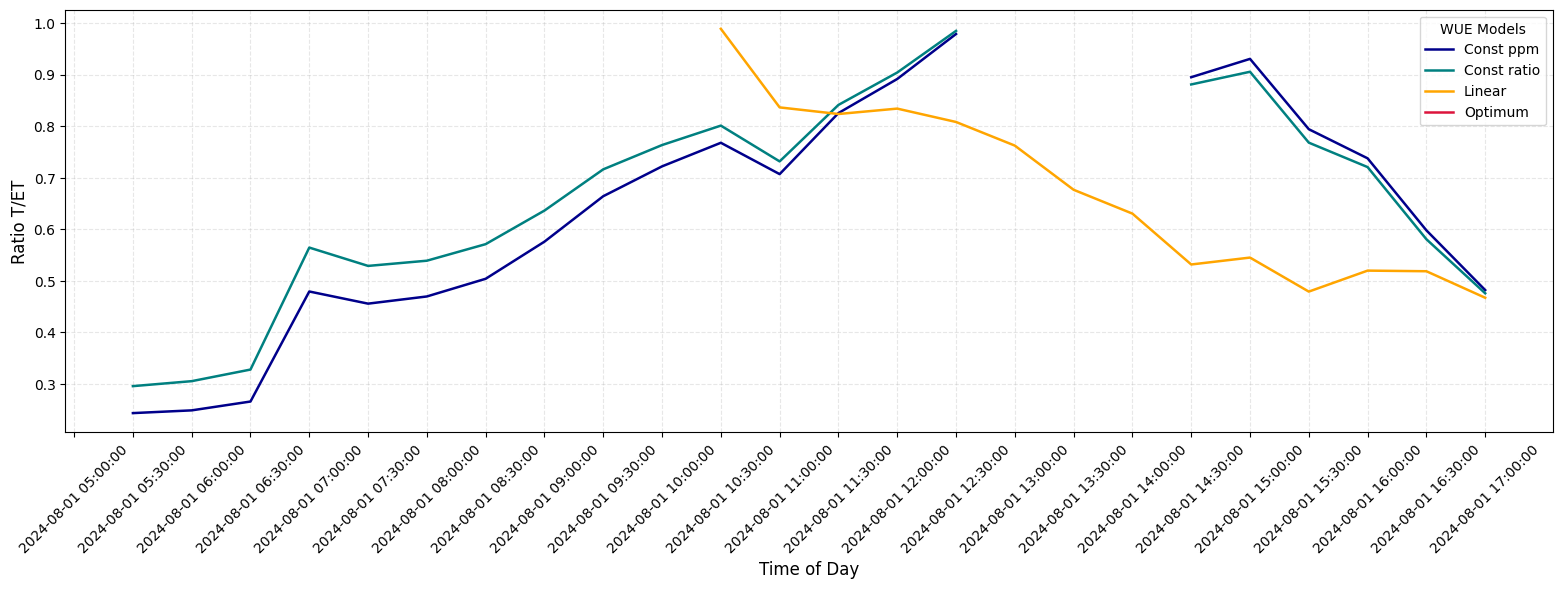

In [10]:
plt.figure(figsize=(16, 5))
plt.plot(df_final['DateTime'], df_final['TET_constCi'], label="Const ppm", color="darkblue", linewidth=1.8)
plt.plot(df_final['DateTime'], df_final['TET_constCiCa'], label="Const ratio", color="teal", linewidth=1.8)
plt.plot(df_final['DateTime'], df_final['TET_linear'], label="Linear", color="orange", linewidth=1.8)
plt.plot(df_final['DateTime'], df_final['TET_opt'], label="Optimum", color="crimson", linewidth=1.8)

plt.xlabel("Time of Day", fontsize=12)
plt.ylabel("Ratio T/ET", fontsize=12)

plt.grid(alpha=0.3, linestyle='--')
plt.legend(title="WUE Models", fontsize=10)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()